### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [87]:
# I keep getting the Kernel died error. Hence the temporary fix for that is the below statement.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [88]:
import numpy as np
import tensorflow as tf
tf.set_random_seed(42)

In [89]:
tf.__version__

'1.14.0'

### Collect Data

In [90]:
# import keras

In [91]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [92]:
trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)

In [93]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [94]:
ohTrainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
ohTestY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [95]:
print(ohTrainY.shape)
print('First 5 examples in Train data now are: ', ohTrainY[0:5])

(60000, 10)
First 5 examples in Train data now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [96]:
print(ohTestY.shape)
print('First 5 examples in Test data now are: ', ohTestY[0:5])

(10000, 10)
First 5 examples in Test data now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

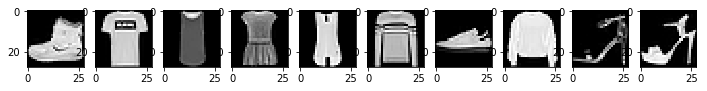

Label for each of the above image :  [9 0 0 3 0 2 7 2 5 5]


In [97]:
# Image printing
import matplotlib.pyplot as plt
w=10
h=10
fig = plt.figure(figsize=(12, 12))
columns = 10
rows = 1
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(trainX[i-1], cmap='gray')
plt.show()

print('Label for each of the above image : ', trainY[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [98]:
# Create a Sequential model
model = tf.keras.models.Sequential()

# Reshape
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Output Layer with 10 neurons
model.add(tf.keras.layers.Dense(10))

# Model compilation
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [99]:
model.fit(trainX, ohTrainY, validation_data=(testX,ohTestY), epochs=100, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 71us/sample - loss: 9.6707 - acc: 0.1408 - val_loss: 10.0068 - val_acc: 0.1437
Epoch 2/100
60000/60000 [==============================] - 3s 56us/sample - loss: 9.7974 - acc: 0.1514 - val_loss: 9.3230 - val_acc: 0.1569
Epoch 3/100
60000/60000 [==============================] - 3s 56us/sample - loss: 9.3484 - acc: 0.1595 - val_loss: 10.2513 - val_acc: 0.1613
Epoch 4/100
60000/60000 [==============================] - 3s 56us/sample - loss: 9.4910 - acc: 0.1633 - val_loss: 9.2261 - val_acc: 0.1654
Epoch 5/100
60000/60000 [==============================] - 3s 56us/sample - loss: 9.6425 - acc: 0.1657 - val_loss: 9.4534 - val_acc: 0.1673
Epoch 6/100
60000/60000 [==============================] - 3s 56us/sample - loss: 9.6758 - acc: 0.1658 - val_loss: 9.2728 - val_acc: 0.1682
Epoch 7/100
60000/60000 [==============================] - 3s 56us/sample - loss: 9.6900 - acc: 0.1667 - val

Epoch 61/100
60000/60000 [==============================] - 3s 57us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 62/100
60000/60000 [==============================] - 3s 57us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 63/100
60000/60000 [==============================] - 4s 59us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 64/100
60000/60000 [==============================] - 3s 58us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 65/100
60000/60000 [==============================] - 4s 59us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 66/100
60000/60000 [==============================] - 3s 58us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 67/100
60000/60000 [==============================] - 4s 59us/sample - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 68/100
60000/60000 [=============================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [100]:
# Create a Sequential model
model1 = tf.keras.models.Sequential()

# Reshape
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

# Output Layer with 10 neurons
model1.add(tf.keras.layers.Dense(10))

# Model compilation
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [101]:
model1.fit(trainX, ohTrainY, validation_data=(testX,ohTestY), epochs=100, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 124us/sample - loss: 6.2059 - acc: 0.2035 - val_loss: 8.2563 - val_acc: 0.2009
Epoch 2/100
60000/60000 [==============================] - 7s 112us/sample - loss: 8.0394 - acc: 0.2126 - val_loss: 8.4951 - val_acc: 0.2477
Epoch 3/100
60000/60000 [==============================] - 7s 111us/sample - loss: 8.0039 - acc: 0.2609 - val_loss: 7.0618 - val_acc: 0.2649
Epoch 4/100
60000/60000 [==============================] - 7s 111us/sample - loss: 6.8368 - acc: 0.2075 - val_loss: 6.3456 - val_acc: 0.1659
Epoch 5/100
60000/60000 [==============================] - 7s 111us/sample - loss: 7.5103 - acc: 0.1484 - val_loss: 6.7678 - val_acc: 0.1840
Epoch 6/100
60000/60000 [==============================] - 7s 111us/sample - loss: 7.3501 - acc: 0.1748 - val_loss: 7.8244 - val_acc: 0.1753
Epoch 7/100
60000/60000 [==============================] - 7s 111us/sample - loss: 8.2989 - acc: 0.2316 

60000/60000 [==============================] - 7s 110us/sample - loss: 7.4876 - acc: 0.3290 - val_loss: 7.8971 - val_acc: 0.3456
Epoch 59/100
60000/60000 [==============================] - 7s 110us/sample - loss: 8.0543 - acc: 0.3288 - val_loss: 8.4078 - val_acc: 0.3399
Epoch 60/100
60000/60000 [==============================] - 7s 110us/sample - loss: 8.3791 - acc: 0.3257 - val_loss: 8.2810 - val_acc: 0.3428
Epoch 61/100
60000/60000 [==============================] - 7s 110us/sample - loss: 8.1780 - acc: 0.3304 - val_loss: 8.4628 - val_acc: 0.3400
Epoch 62/100
60000/60000 [==============================] - 7s 110us/sample - loss: 8.4246 - acc: 0.3288 - val_loss: 8.5830 - val_acc: 0.3392
Epoch 63/100
60000/60000 [==============================] - 7s 112us/sample - loss: 8.5346 - acc: 0.3271 - val_loss: 8.6650 - val_acc: 0.3423
Epoch 64/100
60000/60000 [==============================] - 7s 111us/sample - loss: 8.7189 - acc: 0.3246 - val_loss: 8.7745 - val_acc: 0.3380
Epoch 65/100
60000/

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [102]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

In [103]:
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(trainX, ohTrainY, validation_data=(testX,ohTestY), epochs=100, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 123us/sample - loss: 7.4622 - acc: 0.2617 - val_loss: 7.2615 - val_acc: 0.2801
Epoch 2/100
60000/60000 [==============================] - 7s 111us/sample - loss: 7.4295 - acc: 0.2590 - val_loss: 7.2614 - val_acc: 0.2801
Epoch 3/100
60000/60000 [==============================] - 7s 111us/sample - loss: 7.4138 - acc: 0.2586 - val_loss: 7.2489 - val_acc: 0.2799
Epoch 4/100
60000/60000 [==============================] - 7s 111us/sample - loss: 7.3918 - acc: 0.2602 - val_loss: 7.2776 - val_acc: 0.2789
Epoch 5/100
60000/60000 [==============================] - 7s 111us/sample - loss: 7.3734 - acc: 0.2594 - val_loss: 7.2497 - val_acc: 0.2792
Epoch 6/100
60000/60000 [==============================] - 7s 112us/sample - loss: 7.3748 - acc: 0.2592 - val_loss: 7.2201 - val_acc: 0.2788
Epoch 7/100
60000/60000 [==============================] - 7s 112us/sample - loss: 7.4028 - acc: 0.2574 

60000/60000 [==============================] - 7s 112us/sample - loss: 6.3834 - acc: 0.2285 - val_loss: 6.2626 - val_acc: 0.2464
Epoch 59/100
60000/60000 [==============================] - 7s 112us/sample - loss: 6.3907 - acc: 0.2274 - val_loss: 6.2815 - val_acc: 0.2521
Epoch 60/100
60000/60000 [==============================] - 7s 112us/sample - loss: 6.4340 - acc: 0.2277 - val_loss: 6.2840 - val_acc: 0.2585
Epoch 61/100
60000/60000 [==============================] - 7s 111us/sample - loss: 6.4003 - acc: 0.2274 - val_loss: 6.2995 - val_acc: 0.2499
Epoch 62/100
60000/60000 [==============================] - 7s 112us/sample - loss: 6.4190 - acc: 0.2273 - val_loss: 6.3090 - val_acc: 0.2438
Epoch 63/100
60000/60000 [==============================] - 7s 111us/sample - loss: 6.4229 - acc: 0.2265 - val_loss: 6.2898 - val_acc: 0.2481
Epoch 64/100
60000/60000 [==============================] - 7s 111us/sample - loss: 6.4122 - acc: 0.2262 - val_loss: 6.3072 - val_acc: 0.2531
Epoch 65/100
60000/

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [104]:
# Sequential model
model2 = tf.keras.models.Sequential()

# Reshape
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [105]:
# 1st Dense Layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [106]:
# 2nd Dense Layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [107]:
# Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [108]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 784)               3136      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [109]:
model2.fit(trainX, ohTrainY, validation_data=(testX,ohTestY), epochs=100, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 136us/sample - loss: 1.0568 - acc: 0.6841 - val_loss: 0.6355 - val_acc: 0.7787
Epoch 2/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.5667 - acc: 0.7996 - val_loss: 0.5106 - val_acc: 0.8148
Epoch 3/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4855 - acc: 0.8278 - val_loss: 0.4683 - val_acc: 0.8307
Epoch 4/100
60000/60000 [==============================] - 8s 125us/sample - loss: 0.4518 - acc: 0.8389 - val_loss: 0.4448 - val_acc: 0.8377
Epoch 5/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4283 - acc: 0.8472 - val_loss: 0.4308 - val_acc: 0.8419
Epoch 6/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4128 - acc: 0.8530 - val_loss: 0.4170 - val_acc: 0.8478
Epoch 7/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3962 - acc: 0.8587 

60000/60000 [==============================] - 7s 124us/sample - loss: 0.1792 - acc: 0.9342 - val_loss: 0.3446 - val_acc: 0.8841
Epoch 59/100
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1770 - acc: 0.9349 - val_loss: 0.3508 - val_acc: 0.8853
Epoch 60/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1742 - acc: 0.9356 - val_loss: 0.3425 - val_acc: 0.8875
Epoch 61/100
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1717 - acc: 0.9358 - val_loss: 0.3461 - val_acc: 0.8845
Epoch 62/100
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1692 - acc: 0.9378 - val_loss: 0.3456 - val_acc: 0.8861
Epoch 63/100
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1677 - acc: 0.9384 - val_loss: 0.3509 - val_acc: 0.8840
Epoch 64/100
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1685 - acc: 0.9381 - val_loss: 0.3504 - val_acc: 0.8853
Epoch 65/100
60000/

In [110]:
pred = model2.predict(testX[15:20])
pred

initial = 15
for i in range(len(pred)):
    print('Classification prediction for test data at position [{}] = {}'.format(initial, np.argmax(pred[i])))
    initial = initial + 1

Classification prediction for test data at position [15] = 1
Classification prediction for test data at position [16] = 2
Classification prediction for test data at position [17] = 2
Classification prediction for test data at position [18] = 8
Classification prediction for test data at position [19] = 0


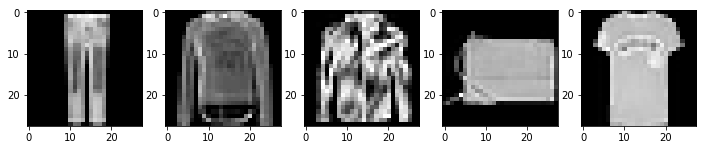

Label for each of the above image :  [1 2 4 8 0]


In [111]:
# Image printing
import matplotlib.pyplot as plt
w=10
h=10
fig = plt.figure(figsize=(12, 12))
columns = 5
rows = 1
testDataIndex = 15
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(testX[testDataIndex], cmap='gray')
    testDataIndex = testDataIndex + 1
plt.show()

print('Label for each of the above image : ', testY[15:20])